# **Laboratorio: Árboles de Decisión vs Random Forest**

## **Objetivo del laboratorio**
Comparar un Árbol de Decisión con un Random Forest. Explorar sus hiperparámetros y evaluar su desempeño en un dataset real.


# **1. Preparacion Inicial**

In [57]:
# Importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
dataset = load_wine(as_frame=True)

# Reproducibilidad
RANDOM_STATE = 42

# Carga de datos
wine = load_wine(as_frame=True)
df = wine.frame.copy() # Recuerda colocar paréntesis pq si no te lo vuelve función en lugar de data frame
# # Variable predictora (input del modelo)
X = df.drop(columns=["target"])
# # Variable objetivo que se quiere predecir
Y = df["target"]


In [58]:
# Información del dataset
print(" Shape X:", X.shape, " Shape y:", Y.shape)
print("Clases:", Y.unique().tolist())
print("Distribución de clases: \n",
      Y.value_counts(normalize=True).round(3))

 Shape X: (178, 13)  Shape y: (178,)
Clases: [0, 1, 2]
Distribución de clases: 
 target
1    0.399
0    0.331
2    0.270
Name: proportion, dtype: float64


In [59]:
# Split 70/30
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=RANDOM_STATE, stratify=Y
)

# **2. Árbol de Desición Básico**

In [60]:
# baseline (árbol de decisión sin ajustar hiperparámetros)
dt_base = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_base.fit(X_train, Y_train) # fitting

y_pred_train = dt_base.predict(X_train) # predicciones sobre los mismos datos de entrenamiento (posible overfititng)
y_pred_test_dt = dt_base.predict(X_test) # predicciones sobre el conjunto de prueba (mide la capacidad de generalizar)

acc_train = accuracy_score(Y_train, y_pred_train) # Proporción de vinos clasificados correctamente en entrenamiento
acc_test = accuracy_score(Y_test, y_pred_test_dt) # Proporción de vinos clasificados correctamente en testing
# si el training accuracy es mayor que el de test puede haber sobreajuste

print(f"[DecisionTree - base] Acc train: {acc_train:.3f} Acc test: {acc_test:.3f}")

print("\n [DecisionTree - base] Classification Report (test)")
print(classification_report(Y_test, y_pred_test_dt, target_names=wine.target_names))

# Precision → de todos los vinos que predije como “clase 0”, ¿qué porcentaje realmente lo eran?
# Recall → de todos los vinos de clase 0, ¿qué porcentaje logré detectar?
# F1-score → balance entre precision y recall.
# Support → número de ejemplos de esa clase en el test.

[DecisionTree - base] Acc train: 1.000 Acc test: 0.963

 [DecisionTree - base] Classification Report (test)
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



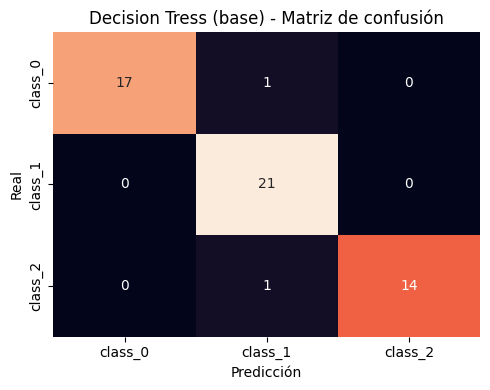

In [61]:
# Matriz de confusión
cm_dt = confusion_matrix(Y_test, y_pred_test_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cbar=False, xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Decision Tress (base) - Matriz de confusión")
plt.xlabel('Predicción'); plt.ylabel('Real')
plt.tight_layout()
plt.show()

**Pregunta de reflexión:** ¿Observas overfitting? ¿Qué diferencias notas entre train y test?

El modelo memorizó completamente los datos de entrenamiento lo cual implica overfitting. A pesar de ello, la diferencia entre train y test accuracy es mínima, en otras palabras, a pesar del overfitting el modelo predice muy bien. Gracias a los resultados se concluyen que hay sobreajuste pero no es crítico.

# **3. Ajustando hiperparámetros del árbol**

[DecisionTree - tuned] Acc train: 0.992 | Acc test: 0.963

[DecisionTree - tuned] Classification Report (test)
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



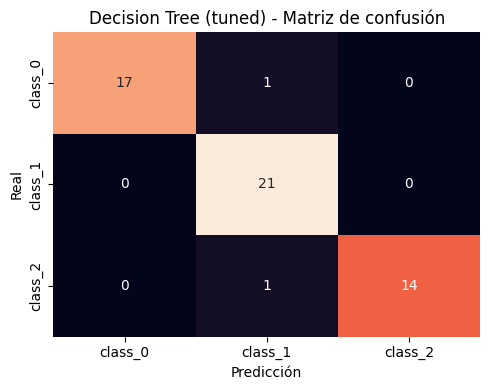

In [62]:
# Árbol regularizado
dt_tuned = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10, # Para evitar que memorice casos individuales
    random_state=RANDOM_STATE
)
dt_tuned.fit(X_train, Y_train)

y_pred_train_dt2 = dt_tuned.predict(X_train)
y_pred_test_dt2  = dt_tuned.predict(X_test)

acc_train_dt2 = accuracy_score(Y_train, y_pred_train_dt2)
acc_test_dt2  = accuracy_score(Y_test, y_pred_test_dt2)
print(f"[DecisionTree - tuned] Acc train: {acc_train_dt2:.3f} | Acc test: {acc_test_dt2:.3f}")

print("\n[DecisionTree - tuned] Classification Report (test)")
print(classification_report(Y_test, y_pred_test_dt2, target_names=wine.target_names))

# Matriz de confusión
cm_dt2 = confusion_matrix(Y_test, y_pred_test_dt2)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt2, annot=True, fmt="d", cbar=False,
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Decision Tree (tuned) - Matriz de confusión")
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.tight_layout()
plt.show()

**Pregunta de reflexión:** ¿Mejoró la generalización? ¿Qué hiperparámetros parecen más importantes para controlar el sobreajuste?

No, la generalización se mantuvo igual. Los hiperparámetros más importantes para controlar el sobreajuste parecen ser max depth y min samples split.

# **4. Random Forest Básico**

[RandomForest - base] Acc train: 1.000 | Acc test: 1.000

[RandomForest - base] Classification Report (test)
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



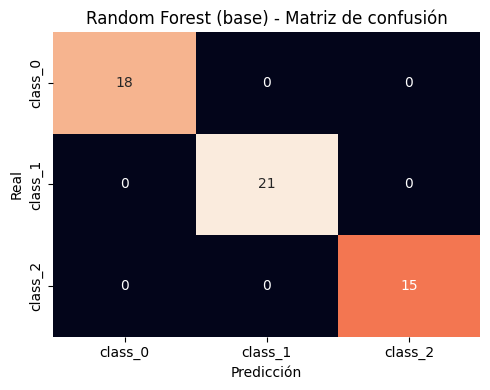

In [63]:
# Entrenar RandomForest por defecto y comparar accuracy vs árbol

rf_base = RandomForestClassifier(random_state=RANDOM_STATE)
rf_base.fit(X_train, Y_train)

y_pred_train_rf = rf_base.predict(X_train)
y_pred_test_rf  = rf_base.predict(X_test)

acc_train_rf = accuracy_score(Y_train, y_pred_train_rf)
acc_test_rf  = accuracy_score(Y_test, y_pred_test_rf)
print(f"[RandomForest - base] Acc train: {acc_train_rf:.3f} | Acc test: {acc_test_rf:.3f}")

print("\n[RandomForest - base] Classification Report (test)")
print(classification_report(Y_test, y_pred_test_rf, target_names=wine.target_names))

cm_rf = confusion_matrix(Y_test, y_pred_test_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cbar=False,
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Random Forest (base) - Matriz de confusión")
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.tight_layout()
plt.show()

**Pregunta de reflexión:** ¿El Random Forest muestra más estabilidad que un solo árbol?

En este caso mostró rendimiento perfecto.

# **5. Explorando Hiperparámetros en Random Forest**

,n_estimators,test_accuracy
0,10,0.962963
1,50,1.000000
2,200,1.000000
3,500,1.000000


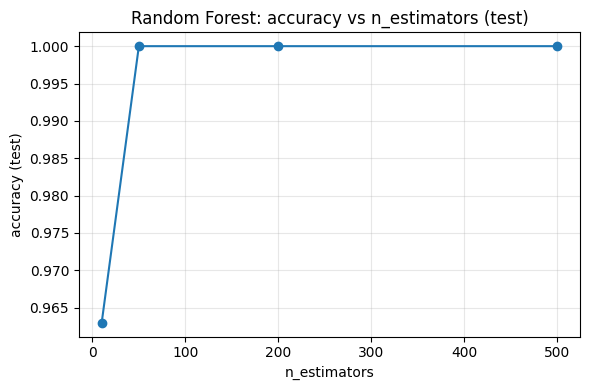

In [64]:
values = [10, 50, 200, 500]
results = []

for n in values:
    model = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE, n_jobs=-1)
    model.fit(X_train, Y_train)
    y_pred_test = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred_test)
    results.append({"n_estimators": n, "test_accuracy": acc})

df_results = pd.DataFrame(results)
display(df_results)

plt.figure(figsize=(6,4))
plt.plot(df_results["n_estimators"], df_results["test_accuracy"], marker="o")
plt.title("Random Forest: accuracy vs n_estimators (test)")
plt.xlabel("n_estimators")
plt.ylabel("accuracy (test)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Pregunta de reflexión:** ¿Vale la pena entrenar con muchísimos árboles? ¿Dónde parece estabilizarse la mejora?

Se estabiliza al llegar a 50 árboles. No vale la pena entrenar con demasiados árboles porque, tal y como se observa anteriormente, lleba un punto en el que se estabiliza.

# **6. Importancia de las Características**

Mejor n_estimators por accuracy test: 50


,0
flavanoids,0.177677
alcohol,0.155654
color_intensity,0.134549
hue,0.133527
od280/od315_of_diluted_wines,0.103641
proline,0.098419
magnesium,0.052765
malic_acid,0.041216
total_phenols,0.037174
alcalinity_of_ash,0.022999


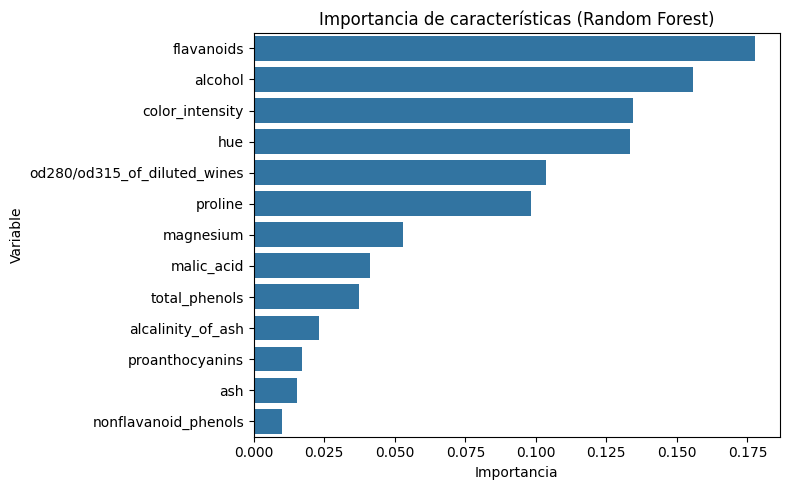

In [65]:
# Elegimos el mejor n_estimators por test_accuracy
best_row = df_results.sort_values("test_accuracy", ascending=False).iloc[0]
best_n = int(best_row["n_estimators"])
print("Mejor n_estimators por accuracy test:", best_n)

rf_best = RandomForestClassifier(n_estimators=best_n, random_state=RANDOM_STATE, n_jobs=-1)
rf_best.fit(X_train, Y_train)

importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de características (Random Forest)")
plt.xlabel("Importancia"); plt.ylabel("Variable")
plt.tight_layout()
plt.show()

**Pregunta de reflexión:** ¿Cuáles variables parecen ser más relevantes para clasificar los vinos? ¿Tiene sentido con el dominio del problema?

Los vinos se distinguen según sus propiedades organolépticas. Están compuestos por flavonoides que influyen en esas propiedades (sabor, amargor, astringencia y color), además, diferentes tipos de vino tienen concentraciones muy distintas de estos compuestos. Luego, el alcohol está relacionado con el proceso de fermentación y la variedad de la uva. Vinos de diferentes regiones y uvas tienen diferentes grados alcohólicos por lo que es fácil distinguirlos entre clases. Las variables no son arbitrarias pues se conectan con lo indicado inicialmente, esto significa que el modelo además de predecir bien, también selecciona las variables que un catador también destacaría.

# **7. Conclusiones**

**Resume en tus propias palabras** qué diferencias encontraste entre un Árbol de Decisión y un Random Forest.

Un árbol de decisión divide los datos en ramas según reglas que le permiten llegar a una predicción. Si se deja crecer mucho tiende a memorizar causando overfitting. Por otro lado, un Random Forest construye muchos árboles en paralelo (bosques :D) y luego combina sus resultados por votación. De esta forma se vuelve más robusto y con menor riesgo de sobreajuste.


**Explica** cómo los hiperparámetros (max_depth, min_samples_split, n_estimators) influyen en el rendimiento.



*   max_depth controla la profundidad del árbol. Si es más alta, entonces memoriza causando sobre ajuste. Mientras que si es más baja simplifica causando underfitting.
*   min_samples_split indica el mínimo de muestras para dividir un nodo. Si es más alto se vuelve un árbol con menos divisiones pequeñas, pero si es más bajo entonces arriesga a memorizar.
* n_estimators disponible para Random Forest es para seleccionar el número de árboles. Si son muy pocos es menos robusto, si son los justos y necesarios es muy estable y si son demasiados se tiene el miso accuracy que en el anterior, pero consumen más memoria y procedimiento.




**Reflexiona:** ¿Qué ventajas ofrece un Random Forest sobre un solo árbol?

Reduce el overfitting al compensarse los errores de un árbol con otros. Se generan predicciones más confiables con mejores generalizaciones a partir de datos nuevos. Permite identificar e interpretar las variables que son más importantes en la clasificación. Finalmente, aunque no se observó particularmente en este lab, es más robusto y suele funcionar bien incluso si hay ruido en los datos.